In [1]:
# arboles de  Arboles_decision Diego Garavito 

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [5]:
#Cargamos el dataset y mostramos las 5 primeras filas
data = pd.read_csv("winequality-red.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
data.shape

(1599, 12)

In [9]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [11]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

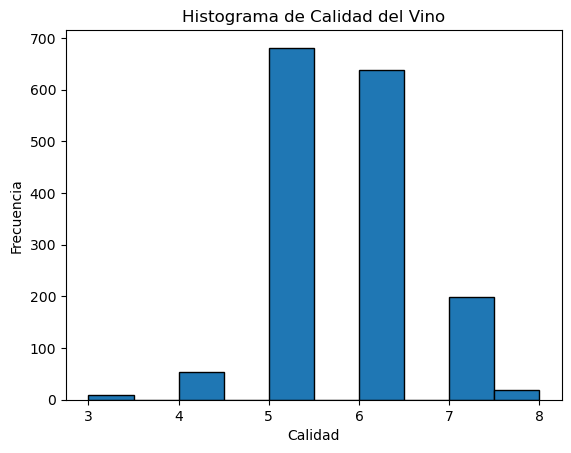

In [33]:
plt.hist(data['quality'], bins=10, edgecolor='black')
plt.xlabel('Calidad')
plt.ylabel('Frecuencia')
plt.title('Histograma de Calidad del Vino')
plt.show()


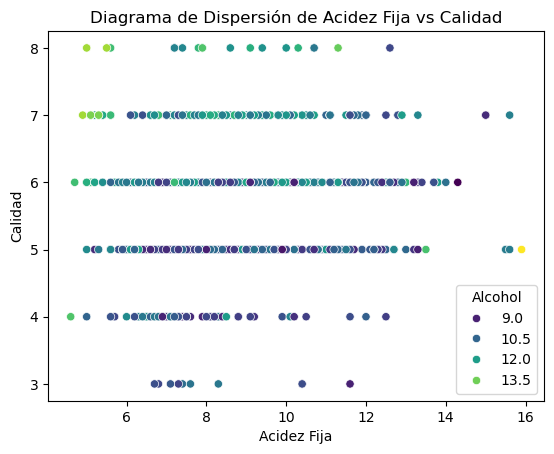

In [35]:
sns.scatterplot(x='fixed acidity', y='quality', hue='alcohol', data=data, palette='viridis')
plt.xlabel('Acidez Fija')
plt.ylabel('Calidad')
plt.title('Diagrama de Dispersión de Acidez Fija vs Calidad')
plt.legend(title='Alcohol')
plt.show()

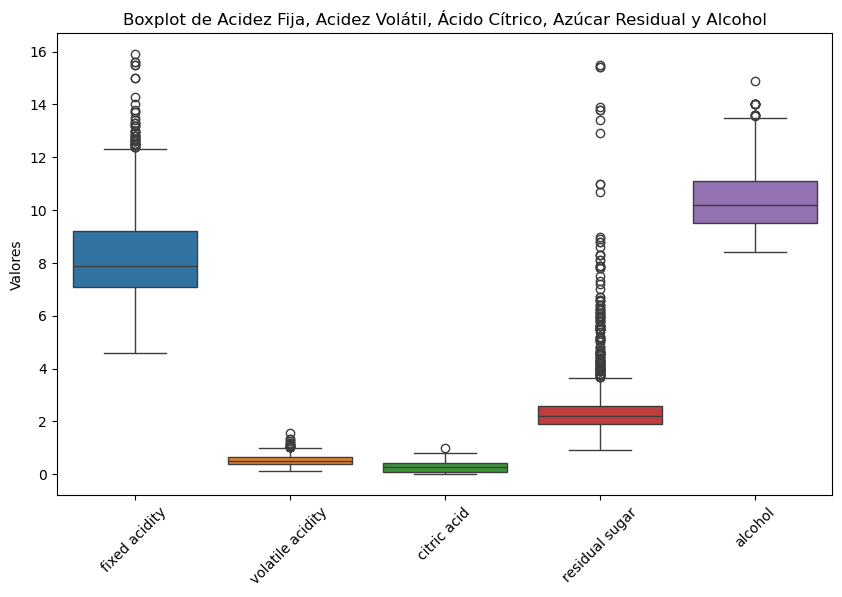

In [39]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'alcohol']])
plt.xticks(rotation=45)
plt.title('Boxplot de Acidez Fija, Acidez Volátil, Ácido Cítrico, Azúcar Residual y Alcohol')
plt.ylabel('Valores')
plt.show()

In [41]:
predictors_col = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "alcohol"]
target_col = ['quality'] 

In [43]:
predictors = data[predictors_col]
target = data[target_col]

In [45]:
predictors

,fixed acidity,volatile acidity,citric acid,residual sugar,alcohol
0,7.4,0.700,0.00,1.9,9.4
1,7.8,0.880,0.00,2.6,9.8
2,7.8,0.760,0.04,2.3,9.8
3,11.2,0.280,0.56,1.9,9.8
4,7.4,0.700,0.00,1.9,9.4
...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,10.5
1595,5.9,0.550,0.10,2.2,11.2
1596,6.3,0.510,0.13,2.3,11.0
1597,5.9,0.645,0.12,2.0,10.2


In [47]:
target

,quality
0,5
1,5
2,5
3,6
4,5
...,...
1594,5
1595,6
1596,6
1597,5


In [49]:
corr = predictors.corr()
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,alcohol
fixed acidity,1.000000,-0.256131,0.671703,0.114777,-0.061668
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,-0.202288
citric acid,0.671703,-0.552496,1.000000,0.143577,0.109903
residual sugar,0.114777,0.001918,0.143577,1.000000,0.042075
alcohol,-0.061668,-0.202288,0.109903,0.042075,1.000000


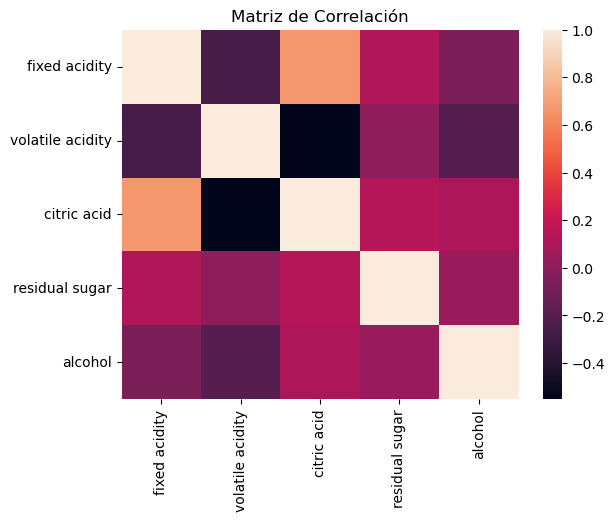

In [51]:
sns.heatmap(corr)
plt.title('Matriz de Correlación')
plt.show()

In [53]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=13)


In [55]:
tree = DecisionTreeClassifier()


In [57]:
arbol = tree.fit(X_train, y_train)


[Text(0.5531483525815217, 0.975, 'x[4] <= 10.525\ngini = 0.646\nsamples = 1279\nvalue = [9.0, 45.0, 535.0, 514.0, 164.0, 12.0]'),
 Text(0.2999557924392583, 0.925, 'x[1] <= 0.548\ngini = 0.546\nsamples = 774\nvalue = [6, 29, 450, 260, 29, 0]'),
 Text(0.42655207251039, 0.95, 'True  '),
 Text(0.12165321291560102, 0.875, 'x[1] <= 0.317\ngini = 0.573\nsamples = 364\nvalue = [1, 8, 172, 163, 20, 0]'),
 Text(0.028132992327365727, 0.825, 'x[0] <= 14.65\ngini = 0.505\nsamples = 54\nvalue = [0, 1, 9, 36, 8, 0]'),
 Text(0.02557544757033248, 0.775, 'x[2] <= 0.225\ngini = 0.477\nsamples = 52\nvalue = [0, 1, 9, 36, 6, 0]'),
 Text(0.020460358056265986, 0.725, 'x[1] <= 0.25\ngini = 0.5\nsamples = 2\nvalue = [0, 0, 1, 0, 1, 0]'),
 Text(0.017902813299232736, 0.675, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0, 0, 0]'),
 Text(0.023017902813299233, 0.675, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 1, 0]'),
 Text(0.030690537084398978, 0.725, 'x[0] <= 8.35\ngini = 0.446\nsamples = 50\nvalue = [0, 1, 8,

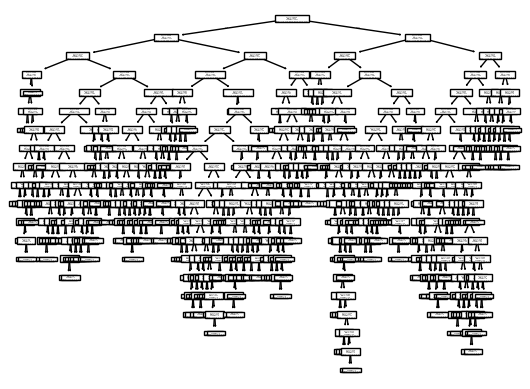

In [59]:
plot_tree(arbol)


In [61]:
predicciones = arbol.predict(X_test)


In [63]:
predicciones

array([6, 5, 5, 5, 6, 5, 6, 7, 5, 7, 6, 6, 5, 5, 7, 5, 6, 6, 5, 5, 5, 6,
       5, 5, 5, 5, 6, 6, 6, 8, 5, 5, 5, 6, 5, 7, 5, 5, 6, 7, 5, 6, 6, 6,
       5, 6, 6, 8, 7, 6, 5, 4, 6, 5, 7, 5, 5, 6, 6, 5, 5, 5, 5, 6, 7, 7,
       5, 5, 5, 5, 6, 5, 5, 6, 5, 5, 5, 5, 5, 5, 6, 7, 6, 5, 6, 6, 6, 5,
       6, 5, 5, 6, 7, 5, 5, 6, 6, 6, 6, 5, 6, 7, 5, 5, 7, 7, 6, 5, 5, 5,
       6, 5, 7, 6, 6, 5, 6, 7, 5, 4, 6, 6, 6, 6, 6, 6, 5, 5, 6, 7, 6, 6,
       6, 7, 6, 5, 7, 5, 6, 7, 5, 6, 4, 6, 7, 6, 4, 5, 5, 5, 5, 7, 6, 5,
       5, 6, 5, 5, 6, 5, 5, 6, 6, 6, 7, 6, 5, 5, 6, 5, 5, 5, 5, 5, 6, 5,
       5, 5, 6, 6, 5, 6, 6, 5, 6, 5, 6, 6, 5, 5, 5, 6, 6, 5, 6, 5, 5, 5,
       5, 5, 6, 6, 6, 5, 6, 6, 6, 5, 7, 6, 7, 5, 5, 6, 7, 5, 5, 6, 5, 6,
       5, 5, 4, 5, 7, 6, 5, 5, 3, 6, 6, 6, 5, 5, 4, 6, 6, 6, 7, 5, 5, 6,
       5, 6, 5, 6, 8, 5, 5, 6, 6, 5, 5, 5, 7, 5, 4, 6, 6, 5, 5, 6, 7, 5,
       5, 5, 6, 7, 5, 7, 4, 5, 6, 5, 5, 3, 8, 5, 5, 5, 5, 5, 6, 5, 6, 5,
       6, 7, 5, 5, 5, 6, 5, 4, 5, 5, 6, 6, 5, 5, 5,

In [65]:
pd.crosstab(np.array([y[0] for y in y_test.values.tolist()]), predicciones, rownames=['Actual'], colnames=['Predicciones'])


Predicciones,3,4,5,6,7,8
Actual,,,,,,
3,0,0,1,0,0,0
4,1,1,2,4,0,0
5,1,6,103,31,4,1
6,0,5,36,68,13,2
7,0,0,9,11,14,1
8,0,0,1,2,3,0


In [67]:
accuracy = accuracy_score(y_test,predicciones)
accuracy

0.58125

In [69]:
precision = precision_score(y_test, predicciones, average='weighted')
precision

0.5834446783477456

In [71]:
recall = recall_score(y_test, predicciones, average='weighted')
recall

0.58125

In [73]:
f1 = f1_score(y_test, predicciones, average='weighted')
f1

0.5818616866063613

In [83]:
print("\nEl modelo presenta un desempeño moderado, con una precisión de 58.1%, una precisión ponderada de 58.3%, un recall de 58.1% y un F1-score de 58.2%. Estos valores sugieren que el modelo tiene una capacidad limitada para clasificar correctamente, siendo consistente pero no altamente preciso en sus predicciones.")



El modelo presenta un desempeño moderado, con una precisión de 58.1%, una precisión ponderada de 58.3%, un recall de 58.1% y un F1-score de 58.2%. Estos valores sugieren que el modelo tiene una capacidad limitada para clasificar correctamente, siendo consistente pero no altamente preciso en sus predicciones.
